# IRGANs Training

In [4]:
import json

with open("labeled_data.json", "r") as f:
    labeled_data = json.load(f)

with open("documents.json", "r") as f:
    documents = json.load(f)

In [1]:
import json

labeled_data_path = "C:/Users/TANAY/Python_project/IRGANs/labeled_data.json"
with open(labeled_data_path, "r") as f:
    labeled_data = json.load(f)

In [2]:
from sklearn.model_selection import train_test_split

# Split into train/val (80%/20%)
train_data, val_data = train_test_split(labeled_data, test_size=0.2, random_state=42)

print(f"Train samples: {len(train_data)}, Val samples: {len(val_data)}")

Train samples: 4601, Val samples: 1151


In [ ]:
from rank_bm25 import BM25Okapi
import torch
import torch.nn as nn


class Discriminator(nn.Module):
    def __init__(self, vocab_size, embed_dim=128):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.fc = nn.Sequential(
            nn.Linear(embed_dim * 2, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, query, doc):
        query_embed = self.embedding(query).mean(dim=1)
        doc_embed = self.embedding(doc).mean(dim=1)
        combined = torch.cat([query_embed, doc_embed], dim=1)
        return self.fc(combined)


class Generator(nn.Module):
    def __init__(self, doc_ids):  # <-- Requires doc_ids
        super().__init__()
        self.doc_ids = doc_ids

    def forward(self, query, top_k=5):
        scores = bm25.get_scores(query.split())
        noise = torch.randn(len(scores))
        noisy_scores = scores + noise.numpy()
        top_indices = noisy_scores.argsort()[-top_k:][::-1]
        return [self.doc_ids[i] for i in top_indices]


doc_ids = list(documents.keys())  # Get all document IDs
corpus = list(documents.values())
tokenized_corpus = [doc.split() for doc in corpus]
bm25 = BM25Okapi(tokenized_corpus)  # Initialize BM25

discriminator = Discriminator(vocab_size=10000)
generator = Generator(doc_ids)  # Now correctly initialized with doc_ids

In [ ]:
# !pip install --upgrade --force-reinstall rank_bm25
!pip install matplotlib

Epoch 1: 100%|██████████| 90/90 [00:37<00:00,  2.37it/s]



Epoch 1/30 | Time: 0:00:37
D Loss: 0.5397 | G Loss: 2.1448

==== Validation Results ====
Accuracy: 0.8123
Precision: 1.0000
Recall: 0.2500
F1 Score: 0.4000
ROC AUC: 0.9900
Confusion Matrix:
[[863   0]
 [216  72]]
Validation accuracy improved from 0.0000 to 0.8123. Saving model...


Epoch 2: 100%|██████████| 90/90 [00:40<00:00,  2.22it/s]



Epoch 2/30 | Time: 0:00:40
D Loss: 0.5163 | G Loss: 2.2645

==== Validation Results ====
Accuracy: 0.8202
Precision: 1.0000
Recall: 0.2812
F1 Score: 0.4390
ROC AUC: 0.9920
Confusion Matrix:
[[863   0]
 [207  81]]
Validation accuracy improved from 0.8123 to 0.8202. Saving model...


Epoch 3: 100%|██████████| 90/90 [00:41<00:00,  2.15it/s]



Epoch 3/30 | Time: 0:00:41
D Loss: 0.4989 | G Loss: 2.3091

==== Validation Results ====
Accuracy: 0.8332
Precision: 1.0000
Recall: 0.3333
F1 Score: 0.5000
ROC AUC: 0.9932
Confusion Matrix:
[[863   0]
 [192  96]]
Validation accuracy improved from 0.8202 to 0.8332. Saving model...


Epoch 4: 100%|██████████| 90/90 [00:39<00:00,  2.30it/s]



Epoch 4/30 | Time: 0:00:39
D Loss: 0.4806 | G Loss: 2.4331

==== Validation Results ====
Accuracy: 0.8445
Precision: 1.0000
Recall: 0.3785
F1 Score: 0.5491
ROC AUC: 0.9955
Confusion Matrix:
[[863   0]
 [179 109]]
Validation accuracy improved from 0.8332 to 0.8445. Saving model...


Epoch 5: 100%|██████████| 90/90 [00:40<00:00,  2.22it/s]



Epoch 5/30 | Time: 0:00:40
D Loss: 0.4669 | G Loss: 2.4293

==== Validation Results ====
Accuracy: 0.8497
Precision: 1.0000
Recall: 0.3993
F1 Score: 0.5707
ROC AUC: 0.9962
Confusion Matrix:
[[863   0]
 [173 115]]
Validation accuracy improved from 0.8445 to 0.8497. Saving model...


Epoch 6: 100%|██████████| 90/90 [00:39<00:00,  2.29it/s]



Epoch 6/30 | Time: 0:00:39
D Loss: 0.4457 | G Loss: 2.5473

==== Validation Results ====
Accuracy: 0.8610
Precision: 1.0000
Recall: 0.4444
F1 Score: 0.6154
ROC AUC: 0.9976
Confusion Matrix:
[[863   0]
 [160 128]]
Validation accuracy improved from 0.8497 to 0.8610. Saving model...


Epoch 7: 100%|██████████| 90/90 [00:39<00:00,  2.29it/s]



Epoch 7/30 | Time: 0:00:39
D Loss: 0.4318 | G Loss: 2.6211

==== Validation Results ====
Accuracy: 0.8705
Precision: 1.0000
Recall: 0.4826
F1 Score: 0.6511
ROC AUC: 0.9971
Confusion Matrix:
[[863   0]
 [149 139]]
Validation accuracy improved from 0.8610 to 0.8705. Saving model...


Epoch 8: 100%|██████████| 90/90 [00:40<00:00,  2.23it/s]



Epoch 8/30 | Time: 0:00:40
D Loss: 0.4195 | G Loss: 2.7128

==== Validation Results ====
Accuracy: 0.8740
Precision: 1.0000
Recall: 0.4965
F1 Score: 0.6636
ROC AUC: 0.9982
Confusion Matrix:
[[863   0]
 [145 143]]
Validation accuracy improved from 0.8705 to 0.8740. Saving model...


Epoch 9: 100%|██████████| 90/90 [00:36<00:00,  2.47it/s]



Epoch 9/30 | Time: 0:00:36
D Loss: 0.4097 | G Loss: 2.7736

==== Validation Results ====
Accuracy: 0.8844
Precision: 1.0000
Recall: 0.5382
F1 Score: 0.6998
ROC AUC: 0.9988
Confusion Matrix:
[[863   0]
 [133 155]]
Validation accuracy improved from 0.8740 to 0.8844. Saving model...


Epoch 10: 100%|██████████| 90/90 [00:37<00:00,  2.40it/s]



Epoch 10/30 | Time: 0:00:37
D Loss: 0.3980 | G Loss: 2.8843

==== Validation Results ====
Accuracy: 0.8888
Precision: 1.0000
Recall: 0.5556
F1 Score: 0.7143
ROC AUC: 0.9990
Confusion Matrix:
[[863   0]
 [128 160]]
Validation accuracy improved from 0.8844 to 0.8888. Saving model...


Epoch 11: 100%|██████████| 90/90 [00:34<00:00,  2.60it/s]



Epoch 11/30 | Time: 0:00:34
D Loss: 0.3828 | G Loss: 2.9744

==== Validation Results ====
Accuracy: 0.8931
Precision: 1.0000
Recall: 0.5729
F1 Score: 0.7285
ROC AUC: 0.9987
Confusion Matrix:
[[863   0]
 [123 165]]
Validation accuracy improved from 0.8888 to 0.8931. Saving model...


Epoch 12: 100%|██████████| 90/90 [00:35<00:00,  2.56it/s]



Epoch 12/30 | Time: 0:00:35
D Loss: 0.3792 | G Loss: 3.0617

==== Validation Results ====
Accuracy: 0.8940
Precision: 1.0000
Recall: 0.5764
F1 Score: 0.7313
ROC AUC: 0.9996
Confusion Matrix:
[[863   0]
 [122 166]]
Validation accuracy did not improve. Current patience: 1/5


Epoch 13: 100%|██████████| 90/90 [00:37<00:00,  2.38it/s]



Epoch 13/30 | Time: 0:00:37
D Loss: 0.3736 | G Loss: 3.1414

==== Validation Results ====
Accuracy: 0.8949
Precision: 1.0000
Recall: 0.5799
F1 Score: 0.7341
ROC AUC: 0.9996
Confusion Matrix:
[[863   0]
 [121 167]]
Validation accuracy improved from 0.8931 to 0.8949. Saving model...


Epoch 14: 100%|██████████| 90/90 [00:37<00:00,  2.42it/s]



Epoch 14/30 | Time: 0:00:37
D Loss: 0.3690 | G Loss: 3.2242

==== Validation Results ====
Accuracy: 0.8983
Precision: 1.0000
Recall: 0.5938
F1 Score: 0.7451
ROC AUC: 0.9999
Confusion Matrix:
[[863   0]
 [117 171]]
Validation accuracy improved from 0.8949 to 0.8983. Saving model...


Epoch 15: 100%|██████████| 90/90 [00:35<00:00,  2.54it/s]



Epoch 15/30 | Time: 0:00:35
D Loss: 0.3620 | G Loss: 3.2648

==== Validation Results ====
Accuracy: 0.9053
Precision: 1.0000
Recall: 0.6215
F1 Score: 0.7666
ROC AUC: 0.9997
Confusion Matrix:
[[863   0]
 [109 179]]
Validation accuracy improved from 0.8983 to 0.9053. Saving model...


Epoch 16: 100%|██████████| 90/90 [00:35<00:00,  2.50it/s]



Epoch 16/30 | Time: 0:00:35
D Loss: 0.3575 | G Loss: 3.3661

==== Validation Results ====
Accuracy: 0.9036
Precision: 1.0000
Recall: 0.6146
F1 Score: 0.7613
ROC AUC: 0.9998
Confusion Matrix:
[[863   0]
 [111 177]]
Validation accuracy did not improve. Current patience: 1/5


Epoch 17: 100%|██████████| 90/90 [00:37<00:00,  2.43it/s]



Epoch 17/30 | Time: 0:00:37
D Loss: 0.3515 | G Loss: 3.4279

==== Validation Results ====
Accuracy: 0.9062
Precision: 1.0000
Recall: 0.6250
F1 Score: 0.7692
ROC AUC: 0.9999
Confusion Matrix:
[[863   0]
 [108 180]]
Validation accuracy did not improve. Current patience: 2/5


Epoch 18: 100%|██████████| 90/90 [00:37<00:00,  2.42it/s]



Epoch 18/30 | Time: 0:00:37
D Loss: 0.3557 | G Loss: 3.5377

==== Validation Results ====
Accuracy: 0.9105
Precision: 1.0000
Recall: 0.6424
F1 Score: 0.7822
ROC AUC: 0.9998
Confusion Matrix:
[[863   0]
 [103 185]]
Validation accuracy improved from 0.9053 to 0.9105. Saving model...


Epoch 19: 100%|██████████| 90/90 [00:37<00:00,  2.41it/s]



Epoch 19/30 | Time: 0:00:37
D Loss: 0.3474 | G Loss: 3.5235

==== Validation Results ====
Accuracy: 0.9053
Precision: 1.0000
Recall: 0.6215
F1 Score: 0.7666
ROC AUC: 0.9999
Confusion Matrix:
[[863   0]
 [109 179]]
Validation accuracy did not improve. Current patience: 1/5


Epoch 20: 100%|██████████| 90/90 [00:36<00:00,  2.44it/s]



Epoch 20/30 | Time: 0:00:36
D Loss: 0.3487 | G Loss: 3.5907

==== Validation Results ====
Accuracy: 0.9053
Precision: 1.0000
Recall: 0.6215
F1 Score: 0.7666
ROC AUC: 1.0000
Confusion Matrix:
[[863   0]
 [109 179]]
Validation accuracy did not improve. Current patience: 2/5


Epoch 21: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]



Epoch 21/30 | Time: 0:00:36
D Loss: 0.3437 | G Loss: 3.6082

==== Validation Results ====
Accuracy: 0.9079
Precision: 1.0000
Recall: 0.6319
F1 Score: 0.7745
ROC AUC: 1.0000
Confusion Matrix:
[[863   0]
 [106 182]]
Validation accuracy did not improve. Current patience: 3/5


Epoch 22: 100%|██████████| 90/90 [00:37<00:00,  2.43it/s]



Epoch 22/30 | Time: 0:00:37
D Loss: 0.3357 | G Loss: 3.6358

==== Validation Results ====
Accuracy: 0.9140
Precision: 1.0000
Recall: 0.6562
F1 Score: 0.7925
ROC AUC: 0.9998
Confusion Matrix:
[[863   0]
 [ 99 189]]
Validation accuracy improved from 0.9105 to 0.9140. Saving model...


Epoch 23: 100%|██████████| 90/90 [00:37<00:00,  2.42it/s]



Epoch 23/30 | Time: 0:00:37
D Loss: 0.3417 | G Loss: 3.7223

==== Validation Results ====
Accuracy: 0.9079
Precision: 1.0000
Recall: 0.6319
F1 Score: 0.7745
ROC AUC: 1.0000
Confusion Matrix:
[[863   0]
 [106 182]]
Validation accuracy did not improve. Current patience: 1/5


Epoch 24: 100%|██████████| 90/90 [00:36<00:00,  2.45it/s]



Epoch 24/30 | Time: 0:00:36
D Loss: 0.3388 | G Loss: 3.7270

==== Validation Results ====
Accuracy: 0.9027
Precision: 1.0000
Recall: 0.6111
F1 Score: 0.7586
ROC AUC: 1.0000
Confusion Matrix:
[[863   0]
 [112 176]]
Validation accuracy did not improve. Current patience: 2/5


Epoch 25: 100%|██████████| 90/90 [00:37<00:00,  2.42it/s]



Epoch 25/30 | Time: 0:00:37
D Loss: 0.3370 | G Loss: 3.7778

==== Validation Results ====
Accuracy: 0.9105
Precision: 1.0000
Recall: 0.6424
F1 Score: 0.7822
ROC AUC: 1.0000
Confusion Matrix:
[[863   0]
 [103 185]]
Validation accuracy did not improve. Current patience: 3/5


Epoch 26: 100%|██████████| 90/90 [00:37<00:00,  2.38it/s]



Epoch 26/30 | Time: 0:00:37
D Loss: 0.3342 | G Loss: 3.8187

==== Validation Results ====
Accuracy: 0.9088
Precision: 1.0000
Recall: 0.6354
F1 Score: 0.7771
ROC AUC: 1.0000
Confusion Matrix:
[[863   0]
 [105 183]]
Validation accuracy did not improve. Current patience: 4/5


Epoch 27: 100%|██████████| 90/90 [00:38<00:00,  2.35it/s]



Epoch 27/30 | Time: 0:00:38
D Loss: 0.3345 | G Loss: 3.8041

==== Validation Results ====
Accuracy: 0.9062
Precision: 1.0000
Recall: 0.6250
F1 Score: 0.7692
ROC AUC: 1.0000
Confusion Matrix:
[[863   0]
 [108 180]]
Validation accuracy did not improve. Current patience: 5/5
Early stopping triggered! Best validation accuracy: 0.9140
Early stopping triggered after 27 epochs!

Total training time: 0:17:10
Loaded best model with validation accuracy: 0.9140

Evaluating final model on test data...

==== Test Results ====
Accuracy: 0.9140
Precision: 1.0000
Recall: 0.6562
F1 Score: 0.7925
ROC AUC: 0.9998
Confusion Matrix:
[[863   0]
 [ 99 189]]


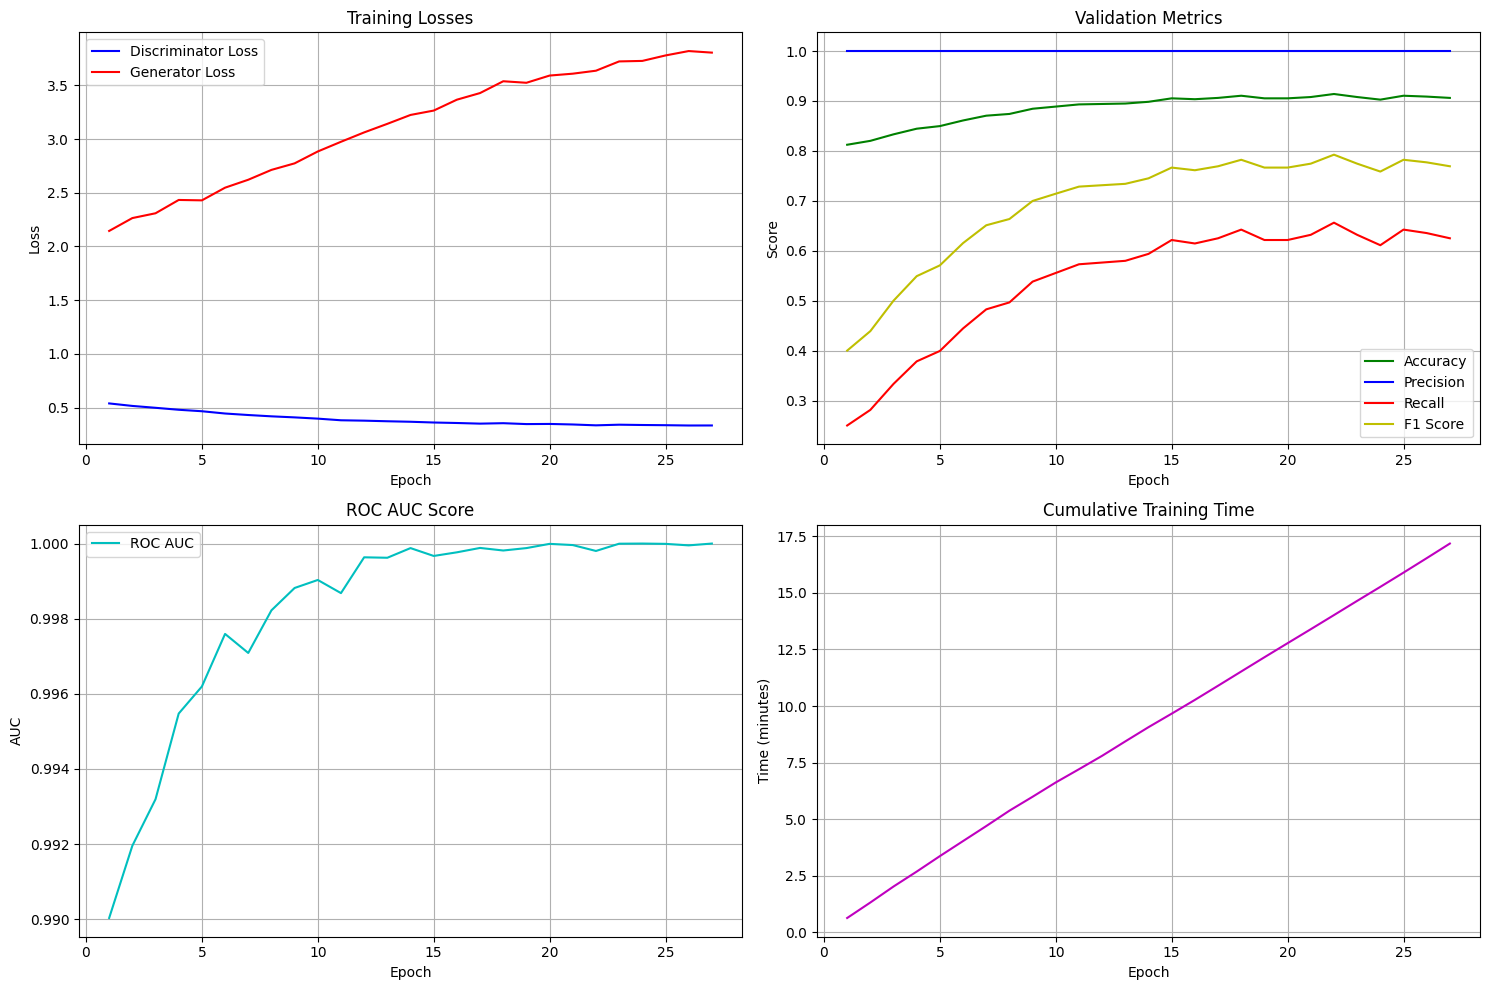


Training complete. Model and history saved.


In [13]:
import torch.optim as optim
from tqdm import tqdm
import numpy as np
import copy
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, confusion_matrix
import time
from datetime import timedelta

# Hyperparameters
NUM_EPOCHS = 30
BATCH_SIZE = 64
LEARNING_RATE = 0.001
PATIENCE = 5  # Number of epochs to wait after validation performance stops improving
MIN_DELTA = 0.001  # Minimum change to qualify as an improvement

# Optimizers
d_optimizer = optim.Adam(discriminator.parameters(), lr=LEARNING_RATE)

# Loss function
criterion = nn.BCELoss()

# Tracking metrics
training_history = {
    'epochs': [],
    'd_loss': [],
    'g_loss': [],
    'val_accuracy': [],
    'val_precision': [],
    'val_recall': [],
    'val_f1': [],
    'val_auc': [],
    'training_time': []
}

# Early stopping setup
best_val_accuracy = 0.0
best_model_state = None
patience_counter = 0
early_stop = False

# Evaluation function with detailed metrics
def evaluate(model, data_loader, is_validation=True):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    all_scores = []
    
    with torch.no_grad():
        for query, doc_id, label in data_loader:
            # Ensure input shape is [1, 1]
            query_tensor = torch.LongTensor([[hash(query) % 10000]])
            doc_tensor = torch.LongTensor([[hash(doc_id) % 10000]])

            output = model(query_tensor, doc_tensor)
            score = output.item()
            predicted = 1 if score > 0.5 else 0
            
            correct += (predicted == label)
            total += 1
            
            all_preds.append(predicted)
            all_labels.append(label)
            all_scores.append(score)
    
    # Calculate metrics
    accuracy = correct / total
    precision, recall, f1, _ = precision_recall_fscore_support(
        all_labels, all_preds, average='binary', zero_division=0
    )
    
    # Avoid ROC AUC calculation errors when only one class is present
    try:
        auc = roc_auc_score(all_labels, all_scores)
    except:
        auc = 0.5  # Default value when ROC AUC cannot be calculated
    
    # Generate confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    
    # Print detailed results
    set_type = "Validation" if is_validation else "Test"
    print(f"\n==== {set_type} Results ====")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {auc:.4f}")
    print(f"Confusion Matrix:")
    print(cm)
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': auc,
        'confusion_matrix': cm,
        'predictions': all_preds,
        'labels': all_labels,
        'scores': all_scores
    }

# Start tracking training time
start_time = time.time()
epoch_start_time = start_time

# Training loop
for epoch in range(NUM_EPOCHS):
    if early_stop:
        print(f"Early stopping triggered after {epoch} epochs!")
        break
        
    # Reset epoch timer
    epoch_start_time = time.time()
    
    discriminator.train()

    # Shuffle data
    np.random.shuffle(labeled_data)

    total_d_loss = 0
    total_g_loss = 0
    batches_processed = 0

    for i in tqdm(range(0, len(labeled_data), BATCH_SIZE), desc=f"Epoch {epoch+1}"):
        batch = labeled_data[i:i+BATCH_SIZE]

        # Prepare batch data
        real_queries = []
        real_docs = []
        real_labels = []
        fake_docs = []

        for query, doc_id, label in batch:
            # Real data
            real_queries.append(query)
            real_docs.append(doc_id)
            real_labels.append(label)

            # Fake data from generator
            fake_doc_id = generator(query)[0]
            fake_docs.append(fake_doc_id)

        # Convert to tensors with proper shape [batch_size, 1]
        real_query_tensors = torch.LongTensor([[hash(q) % 10000] for q in real_queries])
        real_doc_tensors = torch.LongTensor([[hash(d) % 10000] for d in real_docs])
        fake_doc_tensors = torch.LongTensor([[hash(d) % 10000] for d in fake_docs])
        real_labels = torch.FloatTensor(real_labels).unsqueeze(1)  # [batch_size, 1]

        # Train Discriminator
        d_optimizer.zero_grad()

        # Real data loss - ensure inputs are [batch_size, 1]
        real_outputs = discriminator(real_query_tensors, real_doc_tensors)
        real_loss = criterion(real_outputs, real_labels)

        # Fake data loss
        fake_outputs = discriminator(real_query_tensors, fake_doc_tensors)
        fake_loss = criterion(fake_outputs, torch.zeros_like(fake_outputs))

        d_loss = real_loss + fake_loss
        d_loss.backward()
        d_optimizer.step()
        total_d_loss += d_loss.item()

        # Train Generator (REINFORCE)
        sampled_docs = []
        for query in real_queries:
            sampled_docs.append(generator(query)[0])

        # Get rewards from discriminator
        with torch.no_grad():
            query_tensors = torch.LongTensor([[hash(q) % 10000] for q in real_queries])
            doc_tensors = torch.LongTensor([[hash(d) % 10000] for d in sampled_docs])
            rewards = discriminator(query_tensors, doc_tensors)

        # Generator loss
        g_loss = -torch.mean(torch.log(rewards + 1e-8))
        total_g_loss += g_loss.item()
        
        batches_processed += 1

    # Calculate average loss for this epoch
    avg_d_loss = total_d_loss / batches_processed
    avg_g_loss = total_g_loss / batches_processed
    
    # Calculate epoch time
    epoch_time = time.time() - epoch_start_time
    
    print(f"\nEpoch {epoch+1}/{NUM_EPOCHS} | Time: {timedelta(seconds=int(epoch_time))}")
    print(f"D Loss: {avg_d_loss:.4f} | G Loss: {avg_g_loss:.4f}")

    # Evaluate on validation set for early stopping
    val_metrics = evaluate(discriminator, val_data)
    val_accuracy = val_metrics['accuracy']
    
    # Update training history
    training_history['epochs'].append(epoch + 1)
    training_history['d_loss'].append(avg_d_loss)
    training_history['g_loss'].append(avg_g_loss)
    training_history['val_accuracy'].append(val_accuracy)
    training_history['val_precision'].append(val_metrics['precision'])
    training_history['val_recall'].append(val_metrics['recall'])
    training_history['val_f1'].append(val_metrics['f1'])
    training_history['val_auc'].append(val_metrics['auc'])
    training_history['training_time'].append(time.time() - start_time)
    
    # Check if this is the best model so far
    if val_accuracy - best_val_accuracy > MIN_DELTA:
        print(f"Validation accuracy improved from {best_val_accuracy:.4f} to {val_accuracy:.4f}. Saving model...")
        best_val_accuracy = val_accuracy
        best_model_state = copy.deepcopy(discriminator.state_dict())
        patience_counter = 0  # Reset patience counter
    else:
        patience_counter += 1
        print(f"Validation accuracy did not improve. Current patience: {patience_counter}/{PATIENCE}")
        
        # Check if early stopping criteria is met
        if patience_counter >= PATIENCE:
            print(f"Early stopping triggered! Best validation accuracy: {best_val_accuracy:.4f}")
            early_stop = True

# Calculate total training time
total_training_time = time.time() - start_time
print(f"\nTotal training time: {timedelta(seconds=int(total_training_time))}")

# Load the best model
if best_model_state is not None:
    discriminator.load_state_dict(best_model_state)
    print(f"Loaded best model with validation accuracy: {best_val_accuracy:.4f}")

# Final evaluation on test data
print("\nEvaluating final model on test data...")
test_metrics = evaluate(discriminator, val_data, is_validation=False)

# Plot training history
def plot_training_history(history):
    # Create a figure with 2x2 subplots
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    
    # Plot losses
    axs[0, 0].plot(history['epochs'], history['d_loss'], 'b-', label='Discriminator Loss')
    axs[0, 0].plot(history['epochs'], history['g_loss'], 'r-', label='Generator Loss')
    axs[0, 0].set_title('Training Losses')
    axs[0, 0].set_xlabel('Epoch')
    axs[0, 0].set_ylabel('Loss')
    axs[0, 0].legend()
    axs[0, 0].grid(True)
    
    # Plot validation metrics
    axs[0, 1].plot(history['epochs'], history['val_accuracy'], 'g-', label='Accuracy')
    axs[0, 1].plot(history['epochs'], history['val_precision'], 'b-', label='Precision')
    axs[0, 1].plot(history['epochs'], history['val_recall'], 'r-', label='Recall')
    axs[0, 1].plot(history['epochs'], history['val_f1'], 'y-', label='F1 Score')
    axs[0, 1].set_title('Validation Metrics')
    axs[0, 1].set_xlabel('Epoch')
    axs[0, 1].set_ylabel('Score')
    axs[0, 1].legend()
    axs[0, 1].grid(True)
    
    # Plot AUC
    axs[1, 0].plot(history['epochs'], history['val_auc'], 'c-', label='ROC AUC')
    axs[1, 0].set_title('ROC AUC Score')
    axs[1, 0].set_xlabel('Epoch')
    axs[1, 0].set_ylabel('AUC')
    axs[1, 0].legend()
    axs[1, 0].grid(True)
    
    # Plot training time
    cumulative_time = [t/60 for t in history['training_time']]  # Convert to minutes
    axs[1, 1].plot(history['epochs'], cumulative_time, 'm-')
    axs[1, 1].set_title('Cumulative Training Time')
    axs[1, 1].set_xlabel('Epoch')
    axs[1, 1].set_ylabel('Time (minutes)')
    axs[1, 1].grid(True)
    
    plt.tight_layout()
    plt.savefig('training_history.png')
    plt.show()
    
    return fig

# Plot the training history
training_plot = plot_training_history(training_history)

# Save the training history for later analysis
import json
with open('training_history.json', 'w') as f:
    # Convert numpy values to Python native types for JSON serialization
    serializable_history = {
        key: [float(val) if isinstance(val, (np.float32, np.float64)) else val 
              for val in values]
        for key, values in training_history.items()
    }
    json.dump(serializable_history, f)

# Save the model
torch.save({
    'model_state_dict': discriminator.state_dict(),
    'optimizer_state_dict': d_optimizer.state_dict(),
    'training_history': serializable_history,
    'epoch': len(training_history['epochs']),
    'best_val_accuracy': best_val_accuracy,
    'test_metrics': {k: float(v) if isinstance(v, (np.float32, np.float64)) else v.tolist() 
                     if isinstance(v, np.ndarray) else v
                     for k, v in test_metrics.items() if k != 'confusion_matrix'}
}, 'discriminator_model.pth')

print("\nTraining complete. Model and history saved.")

In [ ]:
!pip install langchain langchain_community langchain-text-splitters chromadb sentence-transformers

In [ ]:
!pip install tf-keras langchain langchain_community langchain-text-splitters chromadb sentence-transformers scikit-learn numpy

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import Chroma
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_core.documents import Document

# Install required packages
# pip install langchain langchain_community langchain-text-splitters chromadb sentence-transformers scikit-learn numpy

def load_document_content(json_file_path):
    """Load document content from JSON file"""
    with open("C:/Users/TANAY/Python_project/IRGANs/documents.json", 'r', encoding='utf-8') as f:
        return json.load(f)

def load_query_document_pairs(json_file_path):
    """Load query-document pairs from JSON file"""
    with open("C:/Users/TANAY/Python_project/IRGANs/query_doc_pairs.json", 'r', encoding='utf-8') as f:
        return json.load(f)

# Load your data
document_content = load_document_content('document_content.json')
query_document_pairs = load_query_document_pairs('query_document_pairs.json')

# Initialize HuggingFace embeddings with all-MiniLM model
embeddings = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2",
    model_kwargs={"device": "cpu"}
)

# Convert document content to langchain Document objects
documents = []
for doc_id, content in document_content.items():
    documents.append(
        Document(page_content=content, metadata={"source": doc_id})
    )

# Split documents into chunks
text_splitter = RecursiveCharacterTextSplitter(chunk_size=5000, chunk_overlap=500)
splits = text_splitter.split_documents(documents)

# Create Chroma vector store
vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings)

# Create retriever
retriever = vectorstore.as_retriever(search_kwargs={"k": 3})  # Retrieve top 3 documents

# Enhanced evaluation function with ROC curves
def evaluate_retriever(retriever, query_document_pairs):
    """
    Evaluate retriever performance on query-document pairs with additional metrics
    
    Args:
        retriever: The document retriever
        query_document_pairs: List of [query, doc_id, relevance] pairs
    
    Returns:
        Dictionary with evaluation metrics and raw predictions for plots
    """
    y_true = []
    y_pred = []
    y_scores = []  # Will store similarity scores for ROC curve
    
    # Group queries for efficiency
    query_groups = {}
    for query, doc_id, relevance in query_document_pairs:
        if query not in query_groups:
            query_groups[query] = []
        query_groups[query].append((doc_id, relevance))
    
    print(f"Evaluating {len(query_groups)} unique queries against {len(document_content)} documents...")
    
    # Process each query
    for i, (query, doc_relevance_pairs) in enumerate(query_groups.items()):
        if i % 10 == 0:
            print(f"Processing query {i+1}/{len(query_groups)}")
        
        # Get retriever results with scores
        # First, create an extended retriever function to get scores
        docs_and_scores = vectorstore.similarity_search_with_score(query, k=len(document_content))
        doc_to_score = {doc.metadata["source"]: score for doc, score in docs_and_scores}
        
        # Get normal retriever results for binary predictions
        retrieved_docs = retriever.get_relevant_documents(query)
        retrieved_doc_ids = [doc.metadata["source"] for doc in retrieved_docs]
        
        # Check each document's relevance
        for doc_id, relevance in doc_relevance_pairs:
            y_true.append(relevance)
            # Binary prediction (1 if retrieved, 0 if not)
            y_pred.append(1 if doc_id in retrieved_doc_ids else 0)
            # Get similarity score for ROC curve (higher score is better)
            score = doc_to_score.get(doc_id, 0)
            # Convert to a similarity score (FAISS returns distance, smaller is better)
            # So we negate and normalize to get a similarity score where higher is better
            similarity_score = 1 / (1 + score)  # Adjust based on your similarity measure
            y_scores.append(similarity_score)
    
    # Calculate metrics
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average='binary', zero_division=0
    )
    accuracy = accuracy_score(y_true, y_pred)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "total_samples": len(y_true),
        "positive_samples": sum(y_true),
        "confusion_matrix": cm,
        "roc_data": {
            "fpr": fpr,
            "tpr": tpr,
            "auc": roc_auc
        },
        "raw_predictions": {
            "y_true": y_true,
            "y_pred": y_pred,
            "y_scores": y_scores
        }
    }

# Plot confusion matrix
def plot_confusion_matrix(cm, classes=['Not Relevant', 'Relevant'], title='Confusion Matrix'):
    """
    Plot confusion matrix
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Add text annotations
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matrix.png')
    plt.close()

# Plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, title='Receiver Operating Characteristic'):
    """
    Plot ROC curve
    """
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.savefig('roc_curve.png')
    plt.close()

# Run evaluation
evaluation_results = evaluate_retriever(retriever, query_document_pairs)

# Print results
print("\nRetriever Evaluation Results:")
print(f"Accuracy: {evaluation_results['accuracy']:.4f}")
print(f"Precision: {evaluation_results['precision']:.4f}")
print(f"Recall: {evaluation_results['recall']:.4f}")
print(f"F1 Score: {evaluation_results['f1_score']:.4f}")
print(f"ROC AUC: {evaluation_results['roc_data']['auc']:.4f}")
print(f"Total samples: {evaluation_results['total_samples']}")
print(f"Positive samples: {evaluation_results['positive_samples']}")

# Plot confusion matrix
print("\nGenerating confusion matrix...")
plot_confusion_matrix(evaluation_results['confusion_matrix'])
print("Confusion matrix saved as 'confusion_matrix.png'")

# Plot ROC curve
print("\nGenerating ROC curve...")
plot_roc_curve(
    evaluation_results['roc_data']['fpr'],
    evaluation_results['roc_data']['tpr'],
    evaluation_results['roc_data']['auc']
)
print("ROC curve saved as 'roc_curve.png'")

# Example: Examine some queries and their retrieval results
def examine_examples(retriever, query_document_pairs, num_examples=3):
    """Show detailed results for a few example queries"""
    print("\nDetailed Examples:")
    
    # Get unique queries
    unique_queries = list(set([item[0] for item in query_document_pairs]))
    
    # Look at a few examples
    for i, query in enumerate(unique_queries[:num_examples]):
        print(f"\nExample {i+1}:")
        print(f"Query: {query}")
        
        # Get ground truth relevant documents
        relevant_docs = [pair[1] for pair in query_document_pairs if pair[0] == query and pair[2] == 1]
        print(f"Relevant documents: {relevant_docs}")
        
        # Get retriever results
        retrieved_docs = retriever.get_relevant_documents(query)
        retrieved_info = [(doc.metadata["source"], doc.page_content[:100] + "...") for doc in retrieved_docs]
        
        print("Retrieved documents:")
        for j, (doc_id, preview) in enumerate(retrieved_info):
            print(f"  {j+1}. {doc_id} {'(RELEVANT)' if doc_id in relevant_docs else ''}")
            print(f"     Preview: {preview}")

# Show example results
examine_examples(retriever, query_document_pairs)

Evaluating 1267 unique queries against 480 documents...
Processing query 1/1267
Processing query 11/1267
Processing query 21/1267
Processing query 31/1267
Processing query 41/1267
Processing query 51/1267
Processing query 61/1267
Processing query 71/1267
Processing query 81/1267
Processing query 91/1267
Processing query 101/1267
Processing query 111/1267
Processing query 121/1267
Processing query 131/1267
Processing query 141/1267
Processing query 151/1267
Processing query 161/1267
Processing query 171/1267
Processing query 181/1267
Processing query 191/1267
Processing query 201/1267
Processing query 211/1267
Processing query 221/1267
Processing query 231/1267
Processing query 241/1267
Processing query 251/1267
Processing query 261/1267
Processing query 271/1267
Processing query 281/1267
Processing query 291/1267
Processing query 301/1267
Processing query 311/1267
Processing query 321/1267
Processing query 331/1267
Processing query 341/1267
Processing query 351/1267
Processing query 36

c:\Users\TANAY\anaconda3\envs\cassandra_env\Lib\site-packages\sklearn\metrics\_ranking.py:1179: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(



Retriever Evaluation Results:
Accuracy: 0.4520
Precision: 1.0000
Recall: 0.4520
F1 Score: 0.6226
ROC AUC: nan
Total samples: 1438
Positive samples: 1438

Generating confusion matrix...
Confusion matrix saved as 'confusion_matrix.png'

Generating ROC curve...
ROC curve saved as 'roc_curve.png'

Detailed Examples:

Example 1:
Query: Artificial insemination programs for cattle and buffaloes in India
Relevant documents: ['compendium_part2']
Retrieved documents:
  1. https_www_part108 
     Preview: interfering with the reproductive markers shown in Box tion in the herd and careful examination of ‘...
  2. https_www_part108 
     Preview: interfering with the reproductive markers shown in Box tion in the herd and careful examination of ‘...
  3. Periparturient Diseases of Cattle (VetBooks_part67 
     Preview: ing these underlying factors are essential to effectively managing and improving reproductive perfor...

Example 2:
Query: management of ruminal tympany (bloat)
Relevant documents: [